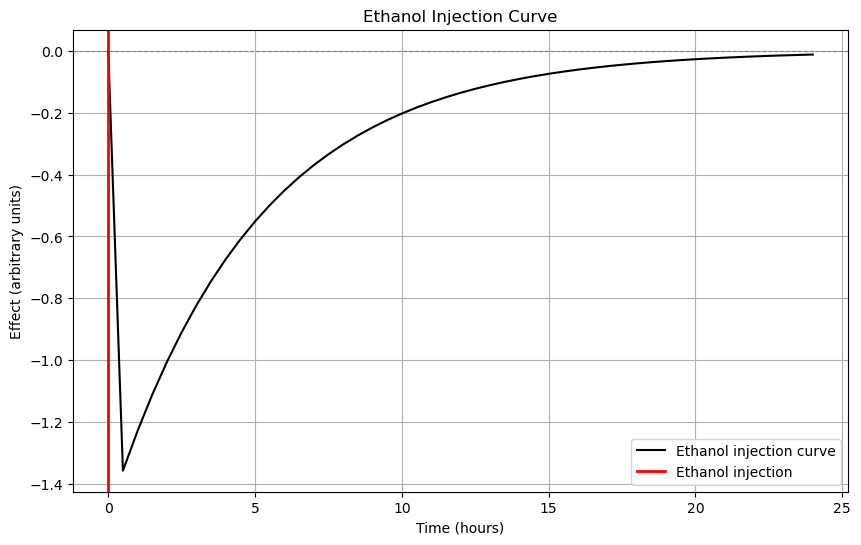

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# Parameters for the function
time_span = 24  # Total hours
time_step = 0.5  # 30-minute increments
time_points = np.arange(0, time_span + time_step, time_step)  # Time array

# Define the curve function
def ethanol_curve(t, drop=-1.5, recovery_rate=0.2):
    if t <= 0:
        return 0
    return drop * np.exp(-recovery_rate * t)  # Exponential recovery to 0

# Generate the curve values
curve_values = np.array([ethanol_curve(t) for t in time_points])

# Plot the curve
plt.figure(figsize=(10, 6))
plt.plot(time_points, curve_values, label="Ethanol injection curve", color="black")
plt.axhline(0, color="gray", linestyle="--", linewidth=0.8)
plt.axvline(0, color="red", linestyle="-", linewidth=2, label="Ethanol injection")
plt.title("Ethanol Injection Curve")
plt.xlabel("Time (hours)")
plt.ylabel("Effect (arbitrary units)")
plt.legend()
plt.grid(True)
plt.show()

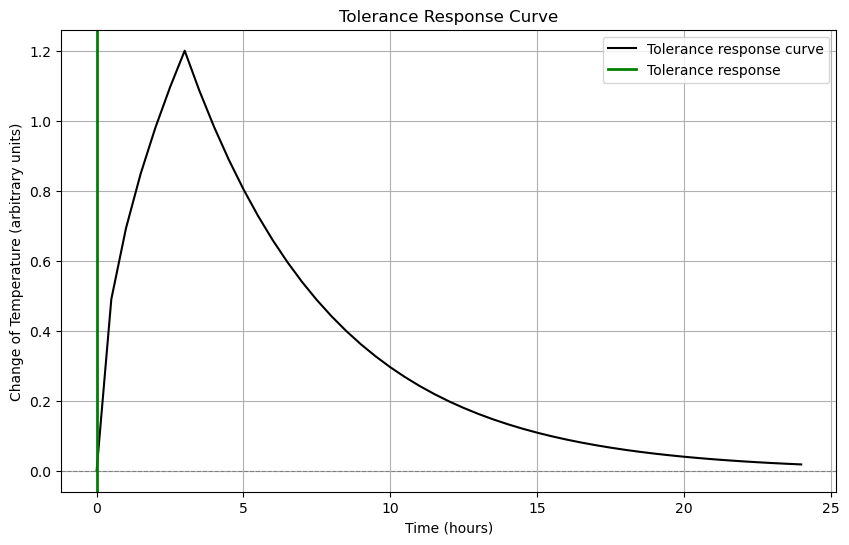

In [10]:
# Parameters for the function
time_span = 24  # Total hours
time_step = 0.5  # 30-minute increments
time_points = np.arange(0, time_span + time_step, time_step)  # Time array

# Define the curve function
def tolerance_response_curve(t, peak=1.2, peak_time=3, rise_power=0.5, decay_rate=0.2):
    if t <= 0:
        return 0
    elif t <= peak_time:
        # Smooth rise with rapid acceleration initially and slowing near the peak
        return peak * ((t / peak_time) ** rise_power)
    else:
        return peak * np.exp(-decay_rate * (t - peak_time))  # Exponential decay


# Generate the curve values
curve_values = np.array([tolerance_response_curve(t) for t in time_points])

# Plot the curve
plt.figure(figsize=(10, 6))
plt.plot(time_points, curve_values, label="Tolerance response curve", color="black")
plt.axhline(0, color="gray", linestyle="--", linewidth=0.8)
plt.axvline(0, color="green", linestyle="-", linewidth=2, label="Tolerance response")
plt.title("Tolerance Response Curve")
plt.xlabel("Time (hours)")
plt.ylabel("Change of Temperature (arbitrary units)")
plt.legend()
plt.grid(True)
plt.show()

Time: 0.0 hours, Ethanol effect: 0.00, Tolerance effect: 0.00
Time: 0.5 hours, Ethanol effect: 0.00, Tolerance effect: 0.49
Time: 1.0 hours, Ethanol effect: 0.00, Tolerance effect: 0.69
Time: 1.5 hours, Ethanol effect: -1.36, Tolerance effect: 0.85
Time: 2.0 hours, Ethanol effect: -1.23, Tolerance effect: 0.98
Time: 2.5 hours, Ethanol effect: -1.11, Tolerance effect: 1.10
Time: 3.0 hours, Ethanol effect: -1.01, Tolerance effect: 1.20
Time: 3.5 hours, Ethanol effect: -0.91, Tolerance effect: 1.09
Time: 4.0 hours, Ethanol effect: -0.82, Tolerance effect: 0.98
Time: 4.5 hours, Ethanol effect: -0.74, Tolerance effect: 0.89
Time: 5.0 hours, Ethanol effect: -0.67, Tolerance effect: 0.80
Time: 5.5 hours, Ethanol effect: -0.61, Tolerance effect: 0.73
Time: 6.0 hours, Ethanol effect: -0.55, Tolerance effect: 0.66
Time: 6.5 hours, Ethanol effect: -0.50, Tolerance effect: 0.60
Time: 7.0 hours, Ethanol effect: -0.45, Tolerance effect: 0.54
Time: 7.5 hours, Ethanol effect: -0.41, Tolerance effect: 

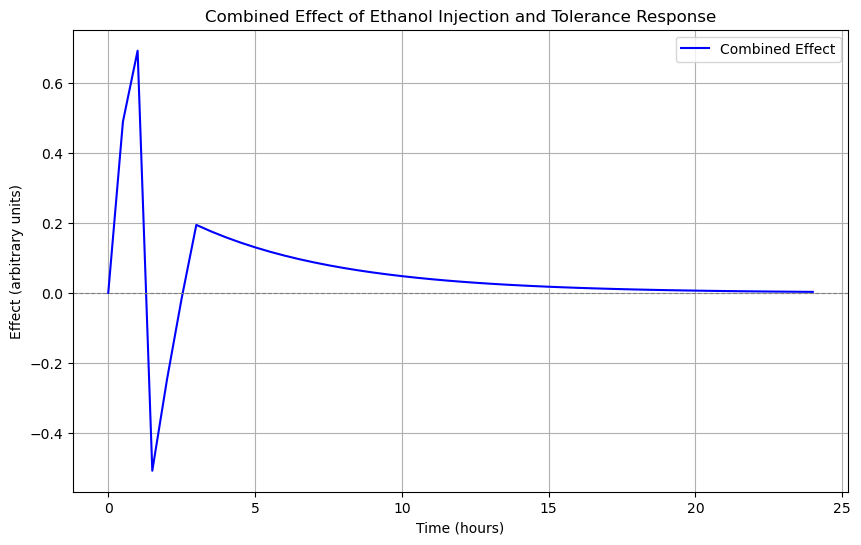

In [22]:
import numpy as np
import matplotlib.pyplot as plt
import torch

class EthanolInjection:
    def __init__(self, injection_timestep):
        self.injection_timestep = injection_timestep

    def ethanol_curve(self, t, drop=-1.5, recovery_rate=0.2):
        if t <= 0 or t > 24:
            return torch.tensor(0)
        return torch.tensor(drop) * torch.exp(torch.tensor(-recovery_rate * t))  # Exponential recovery

    def get_effect(self, t):
        """
        Returns the effect of the ethanol injection
        """
        return self.ethanol_curve(t - self.injection_timestep)

class ToleranceResponse:
    def __init__(self, response_timestep):
        self.response_timestep = response_timestep

    def tolerance_response_curve(self, t, peak=1.2, peak_time=3, rise_power=0.5, decay_rate=0.2):
        if t <= 0 or t > 24:
            return torch.tensor(0)
        elif t <= peak_time:
            # Smooth rise with rapid acceleration initially and slowing near the peak
            return torch.tensor(peak * ((t / peak_time) ** rise_power))
        elif t <= 24:
            return torch.tensor(peak) * torch.exp(torch.tensor(-decay_rate * (t - peak_time)))  # Exponential decay

    def get_effect(self, t):
        """
        Returns the effect of the tolerance response
        """
        return self.tolerance_response_curve(t - self.response_timestep)

# Parameters for simulation
time_span = 24  # Total hours
time_step = 0.5  # 30-minute increments
time_points = np.arange(0, time_span + time_step, time_step)  # Time array

# Initialize classes
ethanol_injection = EthanolInjection(injection_timestep=1)
tolerance_response = ToleranceResponse(response_timestep=0)

# Compute combined effect
combined_effect = []
for t in time_points:
    ethanol_effect = ethanol_injection.get_effect(t)
    tolerance_effect = tolerance_response.get_effect(t)
    print(f"Time: {t:.1f} hours, Ethanol effect: {ethanol_effect:.2f}, Tolerance effect: {tolerance_effect:.2f}")
    combined_effect.append(ethanol_effect + tolerance_effect)

# Plot the combined effect
plt.figure(figsize=(10, 6))
plt.plot(time_points, combined_effect, label="Combined Effect", color="blue")
plt.axhline(0, color="gray", linestyle="--", linewidth=0.8)
plt.title("Combined Effect of Ethanol Injection and Tolerance Response")
plt.xlabel("Time (hours)")
plt.ylabel("Effect (arbitrary units)")
plt.legend()
plt.grid(True)
plt.show()
